In [1]:
## load the data
setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/data/Master_data_file")
data <- read.csv("reproductive_mode_TWISST.popGenwins.csv", header=TRUE)
data_no_2.1 <- read.csv("without_LGC2.1.csv", header=TRUE)
full <- read.csv("full_dlr.csv", header=TRUE)
library("Ternary")
library("dplyr")
library("scales") 
library("DescTools")
library("moments")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
Dlr <- function(df){
    df_counts <- df %>% mutate(side = case_when(
    topo1 > topo2 ~ 'right',
    topo1 < topo2 ~ 'left'))
    
    
    counts <- as.data.frame(table(df_counts$side)) 
    left <-counts[1,2] 
    right <-counts[2,2]

    total <- right + left
    D_lr <- (left-(0.5*total))/(0.5*total)
    
    observed <- c(left,right)
    expected <- c(0.5,0.5)
    
    G <- GTest(x=observed,
      p=expected, 
      correct="none")
    
    G_pvalue <- G[3]
    
    out <-c("dlr" = D_lr, "Gtest_p" = G_pvalue, "nleft" = left, "n_right" = right)
    
    return(out)
}

In [3]:
### table shows number of wins in each category
head(data)
table(data$inv_status)

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
1,34585,Contig38152,38660,2870,6411,4296,3541,100,-1238.902,8204,⋯,0.2813,0.1166,0.1263,0.1858,0.2091,1,0.9655,1_0.9655,LGC1.1,1
2,34583,Contig38152,38661,6419,7922,7059,1503,100,-1490.080,7834,⋯,0.2816,0.1431,0.1299,0.1873,0.1905,1,0.9655,1_0.9655,LGC1.1,1
3,146514,Contig85185,136046,6140,15917,9729,9777,100,-2188.093,7824,⋯,0.0614,0.0581,0.0437,0.1343,0.0022,1,0.9655,1_0.9655,LGC1.1,1
4,76857,Contig48338,76199,23492,38137,30093,14645,100,-1348.566,7496,⋯,0.0987,0.1115,0.0669,0.2127,0.0987,1,0.9655,1_0.9655,LGC1.1,1
5,114234,Contig61183,109130,599,10982,7352,10383,100,-2994.609,7134,⋯,0.0420,0.1125,0.0250,0.1142,0.0505,1,0.9655,1_0.9655,LGC1.1,1
6,134278,Contig73180,126280,85827,103316,99512,17489,100,-1379.880,7133,⋯,0.1016,0.1192,0.1119,0.2810,0.0284,1,0.9655,1_0.9655,LGC1.1,1



   buffer collinear    LGC1.1    LGC1.2   LGC10.1   LGC10.2   LGC11.1 LGC14.1/2 
     5197     60441      1238       156       154      2144       977      1328 
  LGC14.3   LGC17.1    LGC2.1    LGC4.1  LGC6.1/2    LGC7.1    LGC7.2    LGC9.1 
      495       360       383       879       511       331       191      1648 

In [4]:
data_in_map <- subset(data,in_map==1)

In [5]:
### number of windows on the genetic map 
sum(table(data_in_map$inv_status))

[1] 76433

In [6]:
#### number of windows in inverions 
sum(table(data_in_map$inv_status))-60441

[1] 15992

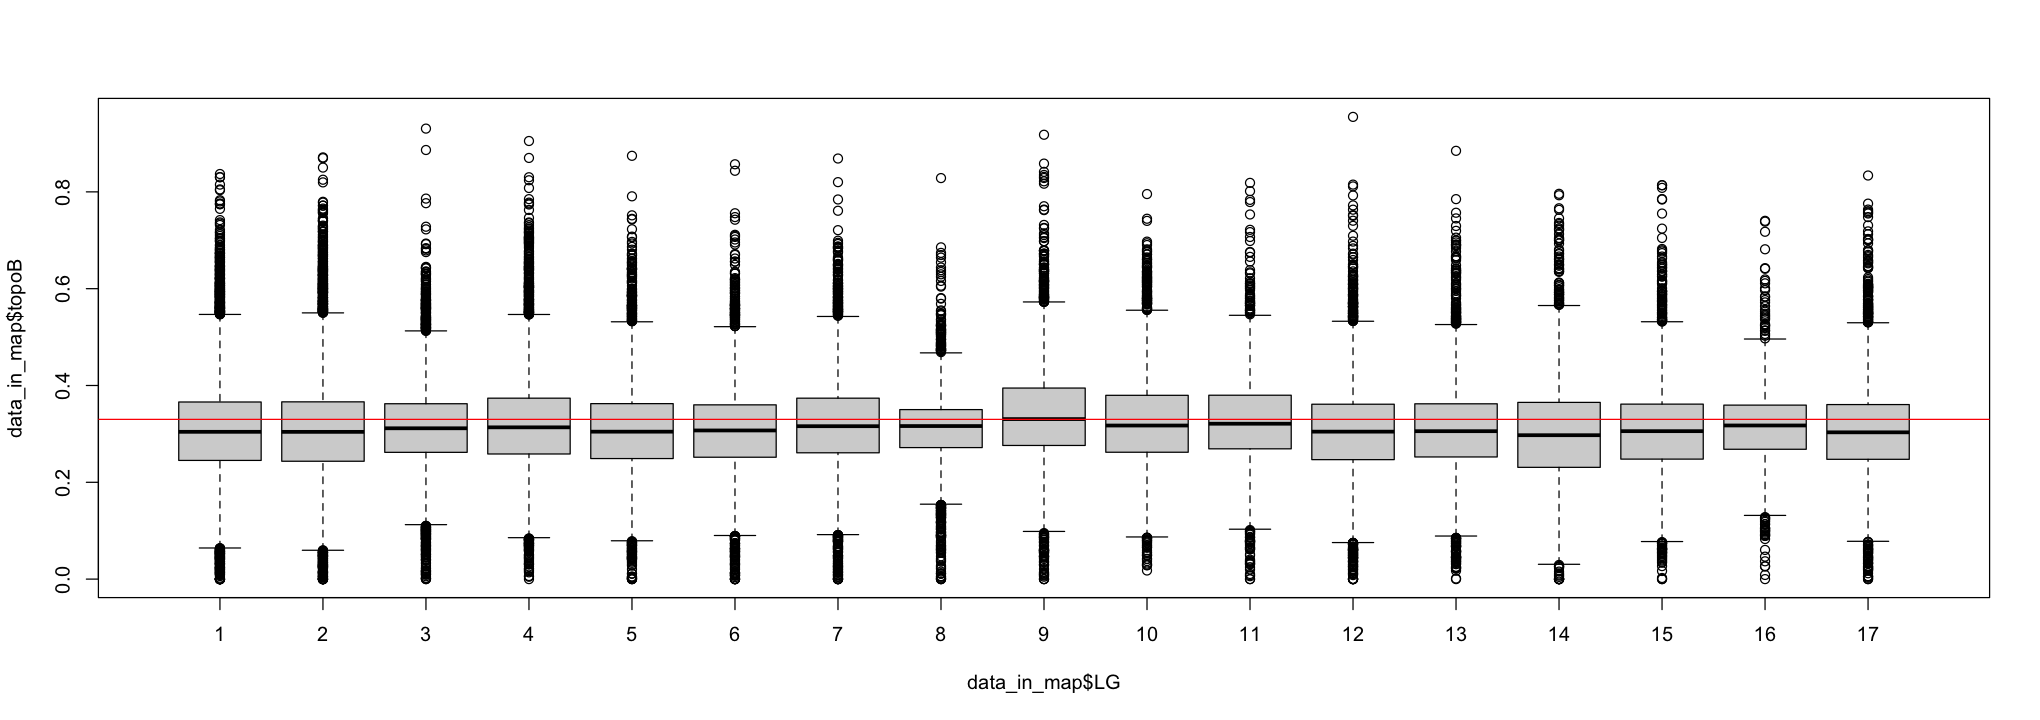

In [7]:
## TB by LG
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoB~data_in_map$LG)
abline(h=0.33, col="red")

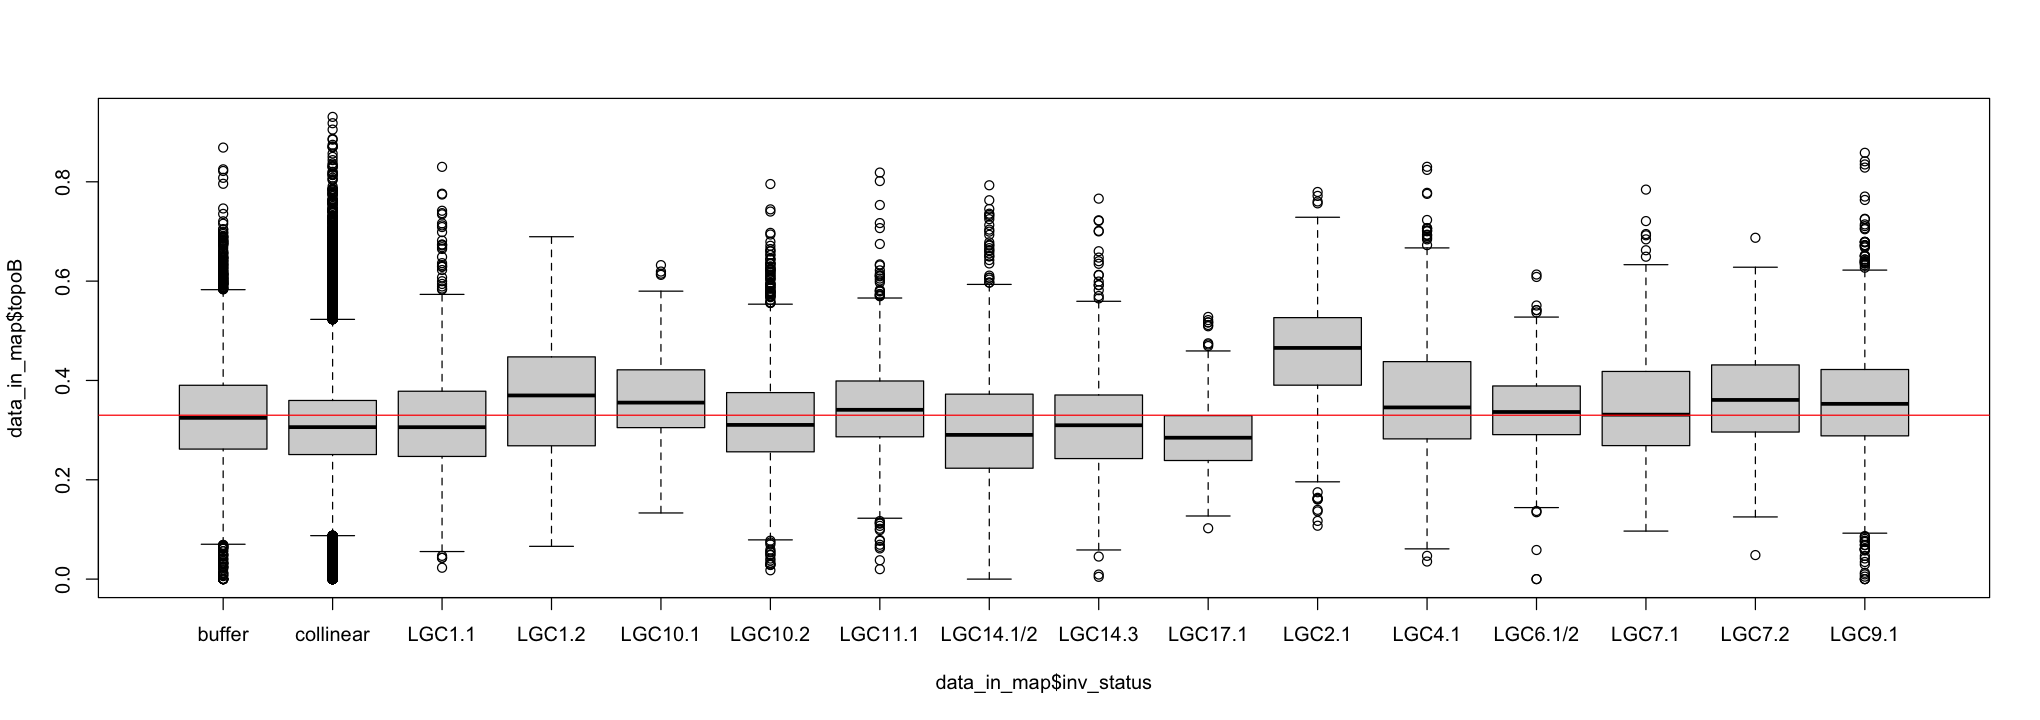

In [8]:
## TB by inversion 
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoB~data_in_map$inv_status)
abline(h=0.33, col="red")


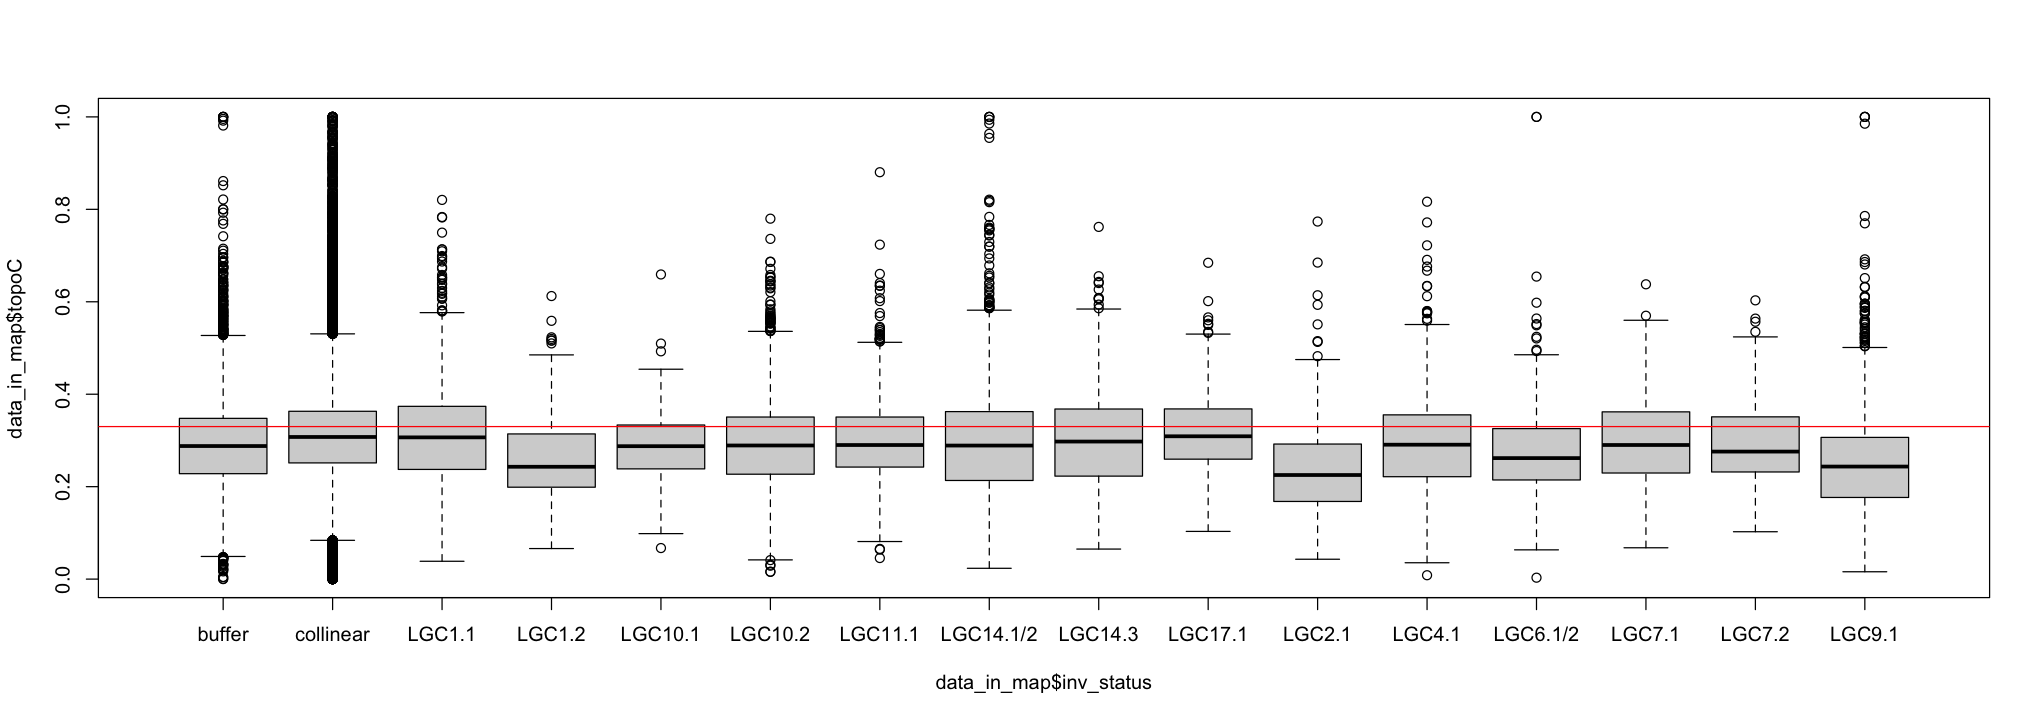

In [42]:
## TC by inversion 
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoC~data_in_map$inv_status)
abline(h=0.33, col="red")

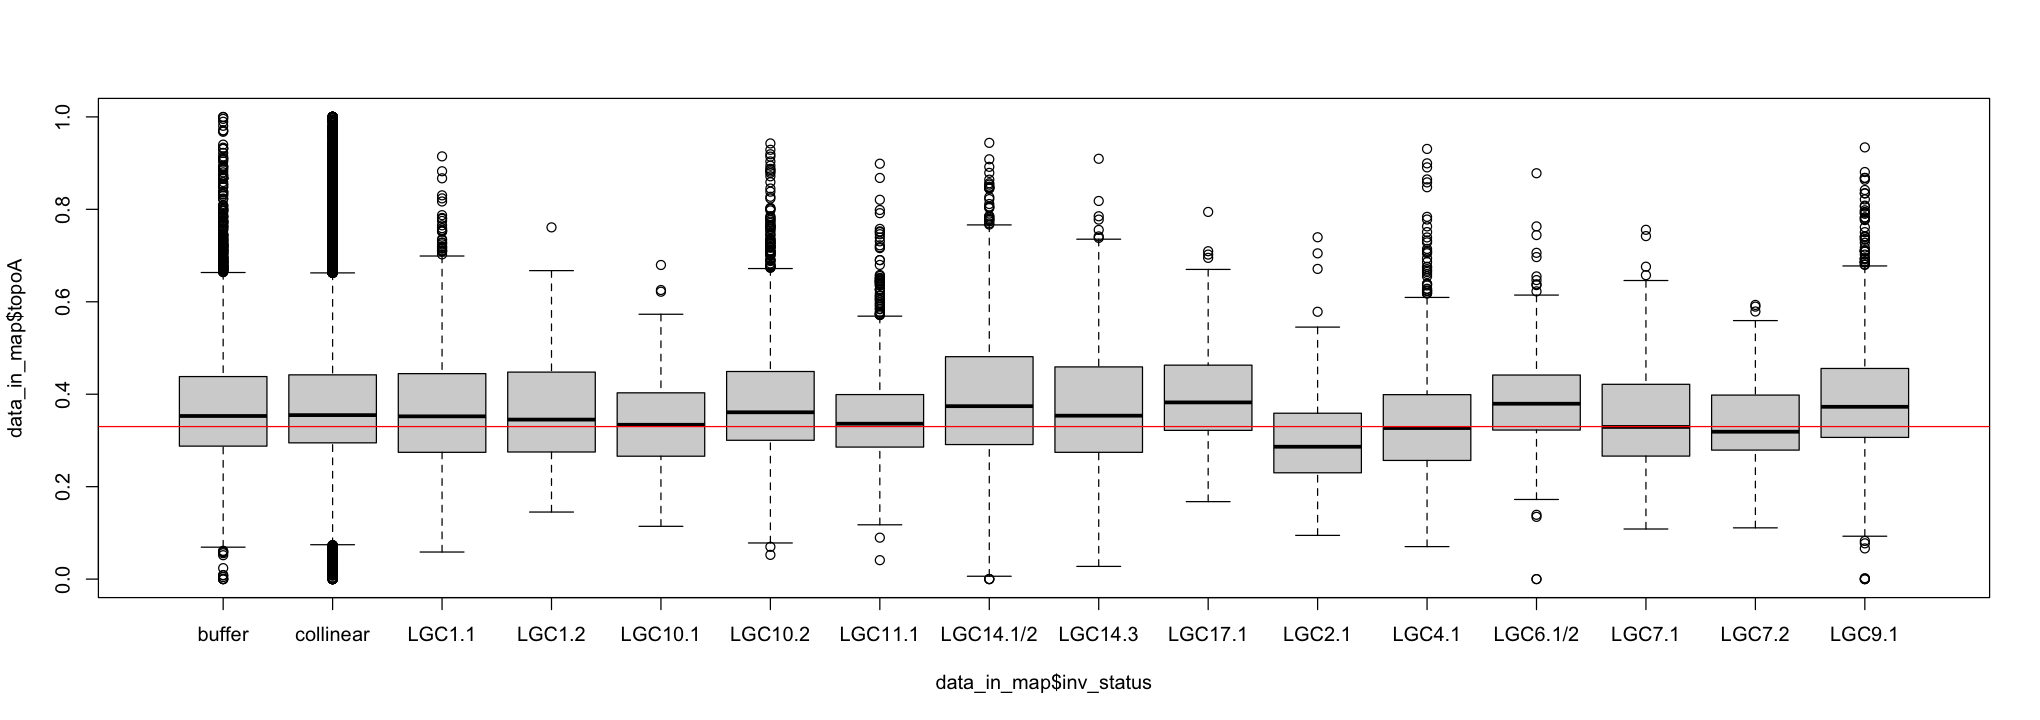

In [43]:
## TA by inversion 
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoA~data_in_map$inv_status)
abline(h=0.33, col="red")

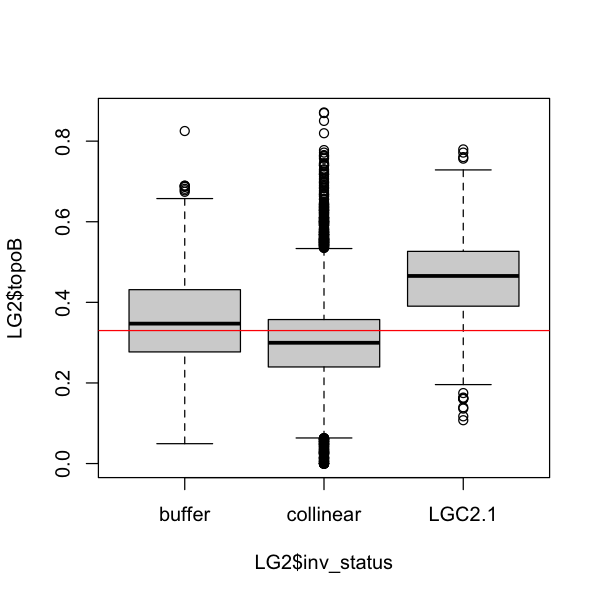

In [9]:
### zoom-in of 2.1

options(repr.plot.width=5, repr.plot.height=5)
LG2 <- subset(data_in_map,LG==2)
boxplot(LG2$topoB~LG2$inv_status)
abline(h=0.33, col="red")

In [10]:
LGC2.1 <- subset(data,inv_status=="LGC2.1")

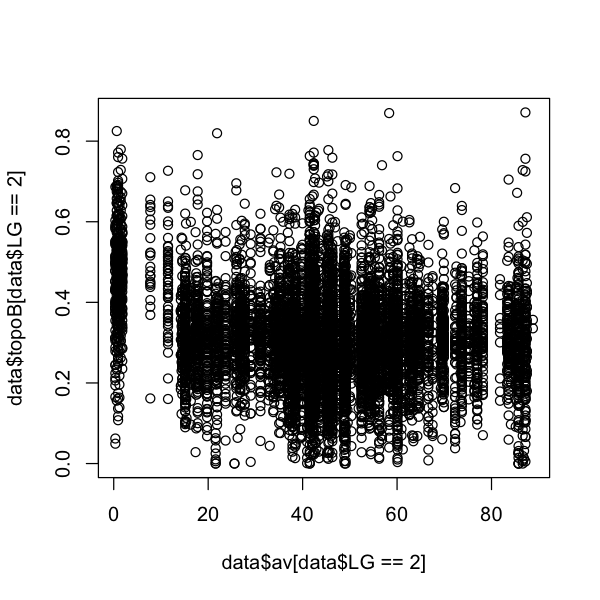

In [11]:
plot(data$av[data$LG==2],data$topoB[data$LG==2])

In [93]:
LGC2.1_weights <- LGC2.1 %>%
  select(topoC, topoA, topoB)
LGC2.1_weights<-na.omit(LGC2.1_weights)
colnames(LGC2.1_weights) <- c('topo3','topo2','topo1')

In [94]:
head(LGC2.1_weights)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
225,0.7736,0.1092,0.1172
37173,0.6848,0.1788,0.1364
37174,0.5934,0.2455,0.1611
37175,0.5511,0.1957,0.2532
37176,0.5132,0.2227,0.2641
37177,0.4750,0.4175,0.1075


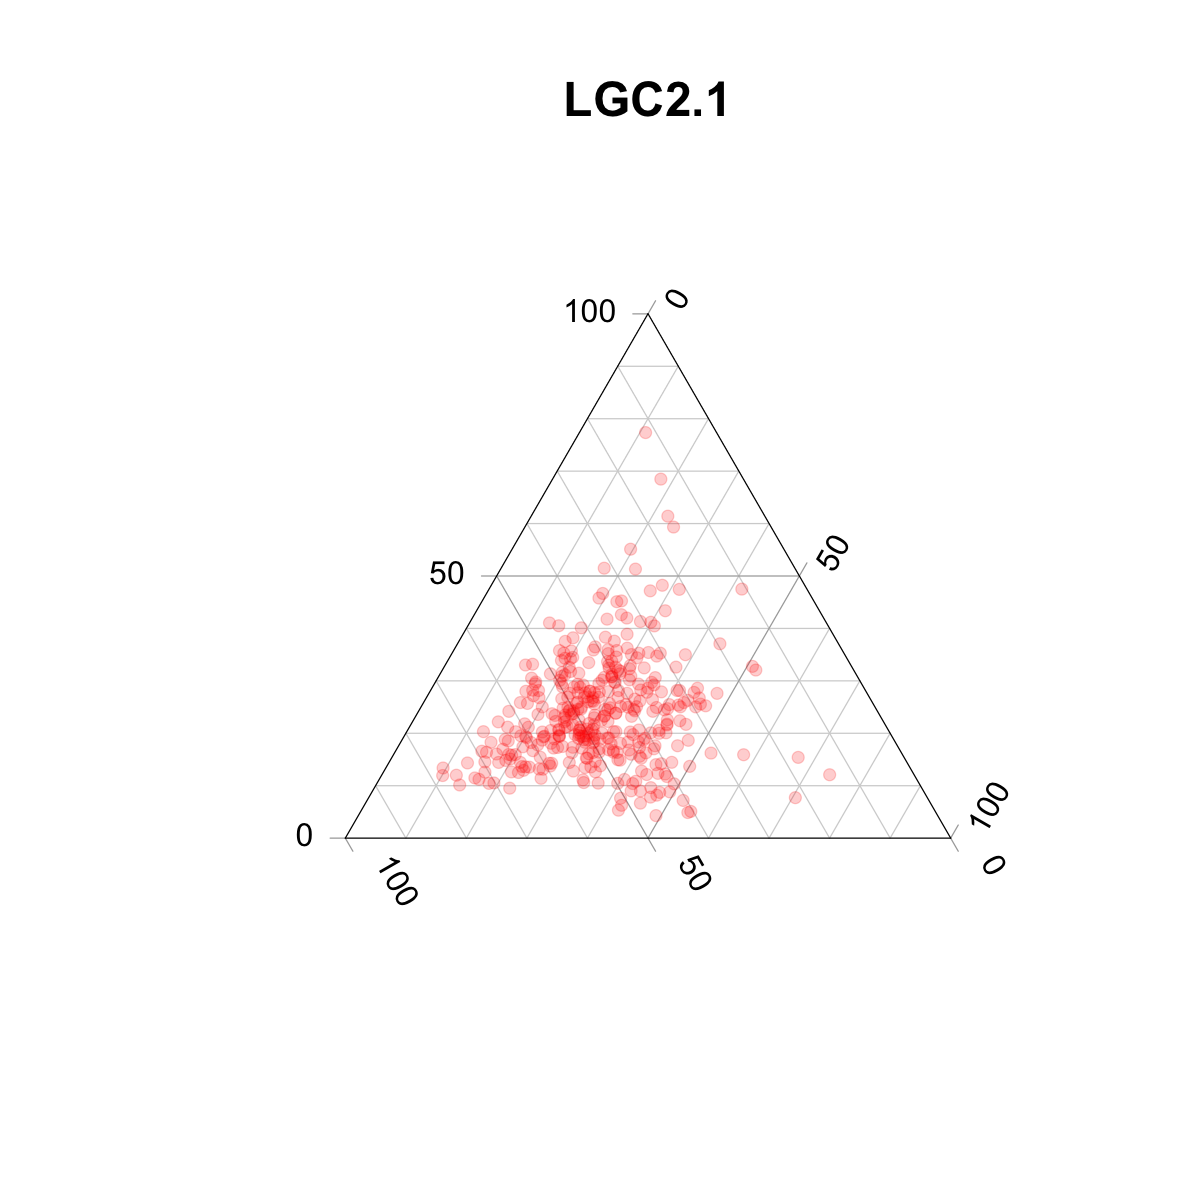

In [95]:
## Triangle plot for 2.1
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
trans = 0.2
TernaryPlot(main="LGC2.1", cex=2, grid.lines = 2)
AddToTernary(points, LGC2.1_weights,cex=2, pch=20, col = alpha("red", trans ))

In [96]:
Dlr(LGC2.1_weights)

$dlr
[1] -0.6

$Gtest_p.p.value
     p.value 
1.016464e-33 

$nleft
[1] 76

$n_right
[1] 304

In [16]:
Dlr(full)

$dlr
[1] 0.03381856

$Gtest_p.p.value
     p.value 
3.173951e-40 

$nleft
[1] 79649

$n_right
[1] 74438

In [17]:
0.0338185570489399*100

[1] 3.381856

In [147]:
inv1 <- subset(data, inv_status=="LGC2.1")
inv1 <- inv1 %>%
  select(topoA, topoB, topoC)
inv1<-na.omit(inv1)
colnames(inv1) <- c('topo3','topo2','topo1')
head(inv1)

inv2 <- subset(data, inv_status=="LGC10.1")
inv2 <- inv2 %>%
  select(topoA, topoB, topoC)
inv2<-na.omit(inv2)
colnames(inv2) <- c('topo3','topo2','topo1')
head(inv2)

inv3 <- subset(data, inv_status=="LGC9.1")
inv3 <- inv3 %>%
  select(topoA, topoB, topoC)
inv3<-na.omit(inv3)
colnames(inv3) <- c('topo3','topo2','topo1')
head(inv3)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
225,0.1092,0.1172,0.7736
37173,0.1788,0.1364,0.6848
37174,0.2455,0.1611,0.5934
37175,0.1957,0.2532,0.5511
37176,0.2227,0.2641,0.5132
37177,0.4175,0.1075,0.4750


,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
11986,0.2938,0.3757,0.3305
11987,0.3064,0.3775,0.3161
11988,0.3433,0.3422,0.3145
11989,0.3596,0.3394,0.3010
11990,0.3889,0.3473,0.2638
11991,0.3213,0.4165,0.2622


,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
417,0.0000,0.0000,1.0000
418,0.0000,0.0000,1.0000
419,0.0000,0.0000,1.0000
420,0.0020,0.0127,0.9853
421,0.1371,0.0773,0.7856
422,0.1705,0.0598,0.7697


In [98]:
head(data2)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
417,0.0000,0.0000,1.0000
418,0.0000,0.0000,1.0000
419,0.0000,0.0000,1.0000
420,0.0020,0.0127,0.9853
421,0.1371,0.0773,0.7856
422,0.1705,0.0598,0.7697


In [99]:
Dlr(data2)

$dlr
[1] 0.4817073

$Gtest_p.p.value
     p.value 
2.696464e-88 

$nleft
[1] 1215

$n_right
[1] 425

In [100]:
inversions <- subset(data, grepl("^LGC", inv_status))
inversions
data3 <- inversions %>%
  select(topoA, topoC, topoB)
data3<-na.omit(data3)
colnames(data3) <- c('topo3','topo2','topo1')

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
1,34585,Contig38152,38660,2870,6411,4296,3541,100,-1238.9016,8204,⋯,0.2813,0.1166,0.1263,0.1858,0.2091,1,0.9655,1_0.9655,LGC1.1,1
2,34583,Contig38152,38661,6419,7922,7059,1503,100,-1490.0799,7834,⋯,0.2816,0.1431,0.1299,0.1873,0.1905,1,0.9655,1_0.9655,LGC1.1,1
3,146514,Contig85185,136046,6140,15917,9729,9777,100,-2188.0931,7824,⋯,0.0614,0.0581,0.0437,0.1343,0.0022,1,0.9655,1_0.9655,LGC1.1,1
4,76857,Contig48338,76199,23492,38137,30093,14645,100,-1348.5665,7496,⋯,0.0987,0.1115,0.0669,0.2127,0.0987,1,0.9655,1_0.9655,LGC1.1,1
5,114234,Contig61183,109130,599,10982,7352,10383,100,-2994.6087,7134,⋯,0.0420,0.1125,0.0250,0.1142,0.0505,1,0.9655,1_0.9655,LGC1.1,1
6,134278,Contig73180,126280,85827,103316,99512,17489,100,-1379.8801,7133,⋯,0.1016,0.1192,0.1119,0.2810,0.0284,1,0.9655,1_0.9655,LGC1.1,1
7,114095,Contig61139,109006,34114,55992,49590,21878,100,-1621.5896,7093,⋯,0.0816,0.1896,0.0585,0.3697,0.0654,1,0.9655,1_0.9655,LGC1.1,1
87,116839,Contig62390,111391,46154,50150,48106,3996,100,-1273.6314,7798,⋯,0.2511,0.2442,0.0698,0.1721,0.0049,10,26.8905,10_26.8905,LGC10.2,1
91,44501,Contig40083,47684,141432,143164,142264,1732,100,-1632.4222,7361,⋯,0.1239,0.0698,0.0566,0.1642,0.0659,10,7.1540,10_7.154,LGC10.2,1


In [101]:
Dlr(data3)

$dlr
[1] -0.2364991

$Gtest_p.p.value
      p.value 
6.665044e-134 

$nleft
[1] 4100

$n_right
[1] 6640

In [102]:
head(data3)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
1,0.0668,0.8204,0.1128
2,0.1355,0.7834,0.0811
3,0.1357,0.7824,0.0819
4,0.1128,0.7496,0.1376
5,0.1076,0.7134,0.1790
6,0.1271,0.7133,0.1596


In [180]:
pdf("top_3_inv_tc_3plots.pdf", width = 10, height = 14) 
library(repr)
par(mfrow=c(1,3),mar = c(0.3, 0.3, 0.3, 0.3))
options(repr.plot.width=6, repr.plot.height=6)
trans = 0.1
TernaryPlot(main="LGC9.1", cex=1.5, grid.lines = 2)
AddToTernary(points, inv3,cex=2, pch=0, col = alpha("gray40",0.25))
TernaryPlot(main="LGC10.1", cex=1.5, grid.lines = 2)
AddToTernary(points, inv2,cex=2, pch=2, col = alpha("red",0.25))
TernaryPlot(main="LGC2.1", cex=1.5, grid.lines = 2)
AddToTernary(points, inv1,cex=2, pch=1, col = alpha("blue",0.25))
dev.off()

pdf 
  2

In [27]:
inversions <- subset(data, grepl("^LGC", inv_status))
inv_list <- unique(inversions$inv_status)
inv_list

[1] "LGC1.1"    "LGC10.2"   "LGC11.1"   "LGC14.1/2" "LGC14.3"   "LGC2.1"   
 [7] "LGC4.1"    "LGC6.1/2"  "LGC9.1"    "LGC1.2"    "LGC10.1"   "LGC17.1"  
[13] "LGC7.1"    "LGC7.2"

In [26]:
length(data$start)

[1] 154971

In [41]:
inversions <- subset(data, grepl("^LGC", inv_status))
inv_list <- sort(unique(inversions$inv_status))
inv_list

for(i in inv_list) {
    
inv <- subset(data, inv_status==i)
inv <- inv %>%
  select(topoA, topoB, topoC)
inv<-na.omit(inv)
colnames(inv) <- c('topo3','topo2','topo1')

print(Dlr(inv))
    
}

[1] "LGC1.1"    "LGC1.2"    "LGC10.1"   "LGC10.2"   "LGC11.1"   "LGC14.1/2"
 [7] "LGC14.3"   "LGC17.1"   "LGC2.1"    "LGC4.1"    "LGC6.1/2"  "LGC7.1"   
[13] "LGC7.2"    "LGC9.1"

$dlr
[1] 0.03908795

$Gtest_p.p.value
  p.value 
0.1707097 

$nleft
[1] 638

$n_right
[1] 590

$dlr
[1] 0.474359

$Gtest_p.p.value
     p.value 
1.484839e-09 

$nleft
[1] 115

$n_right
[1] 41

$dlr
[1] 0.503268

$Gtest_p.p.value
     p.value 
1.887313e-10 

$nleft
[1] 115

$n_right
[1] 38

$dlr
[1] 0.1433927

$Gtest_p.p.value
     p.value 
3.234176e-11 

$nleft
[1] 1220

$n_right
[1] 914

$dlr
[1] 0.30793

$Gtest_p.p.value
     p.value 
3.892687e-22 

$nleft
[1] 635

$n_right
[1] 336

$dlr
[1] 0.06202723

$Gtest_p.p.value
   p.value 
0.02407114 

$nleft
[1] 702

$n_right
[1] 620

$dlr
[1] 0.07755102

$Gtest_p.p.value
   p.value 
0.08588288 

$nleft
[1] 264

$n_right
[1] 226

$dlr
[1] -0.2178771

$Gtest_p.p.value
     p.value 
3.487921e-05 

$nleft
[1] 140

$n_right
[1] 218

$dlr
[1] 0.8057743

$Gtest_p.p.value
     p.value 
5.166226e-64 

$nleft
[1] 344

$n_right
[1] 37

$dlr
[1] 0.2787258

$Gtest_p.p.value
    p.value 
8.89366e-17 

$nleft
[1] 562

$n_right
[1] 317

$dlr
[1] 0.4381139

In [64]:
dlr_inv <- read.csv("dlr_by_inversion.csv",header=TRUE)

In [65]:
dlr_inv

Inversion,DLR,p.value,left,right,total_wins,abs_dlr,ord
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
LGC1.1,0.03908795,1.707097e-01,638,590,1228,0.03908795,1
LGC2.1,0.06202723,2.407114e-02,702,620,1322,0.06202723,2
LGC4.1,0.07755102,8.588288e-02,264,226,490,0.07755102,3
LGC14.1/2,0.14339270,3.230000e-11,1220,914,2134,0.14339270,4
LGC17.1,0.16463410,2.803944e-03,191,137,328,0.16463410,5
LGC6.1/2,-0.21787710,3.490000e-05,140,218,358,0.21787710,6
LGC1.2,0.27872580,8.890000e-17,562,317,879,0.27872580,7
LGC14.3,0.30793000,3.890000e-22,635,336,971,0.30793000,8
LGC7.1,0.39267020,3.780000e-08,133,58,191,0.39267020,9


In [136]:
pdf("variableSplitTimes.pdf", width = 10, height = 14) 
library(repr)
options(repr.plot.width=6, repr.plot.height=8)
plot(dlr_inv$DLR, dlr_inv$ord, xlim=c(1,-1), pch=20, cex=2, xlab="Dlr", ylab="Inversion")
abline(v=0)
dev.off() 

pdf 
  2


	Pearson's product-moment correlation

data:  dlr_inv$abs_dlr and dlr_inv$total_wins
t = -1.4482, df = 12, p-value = 0.1732
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7606245  0.1821519
sample estimates:
       cor 
-0.3857044 


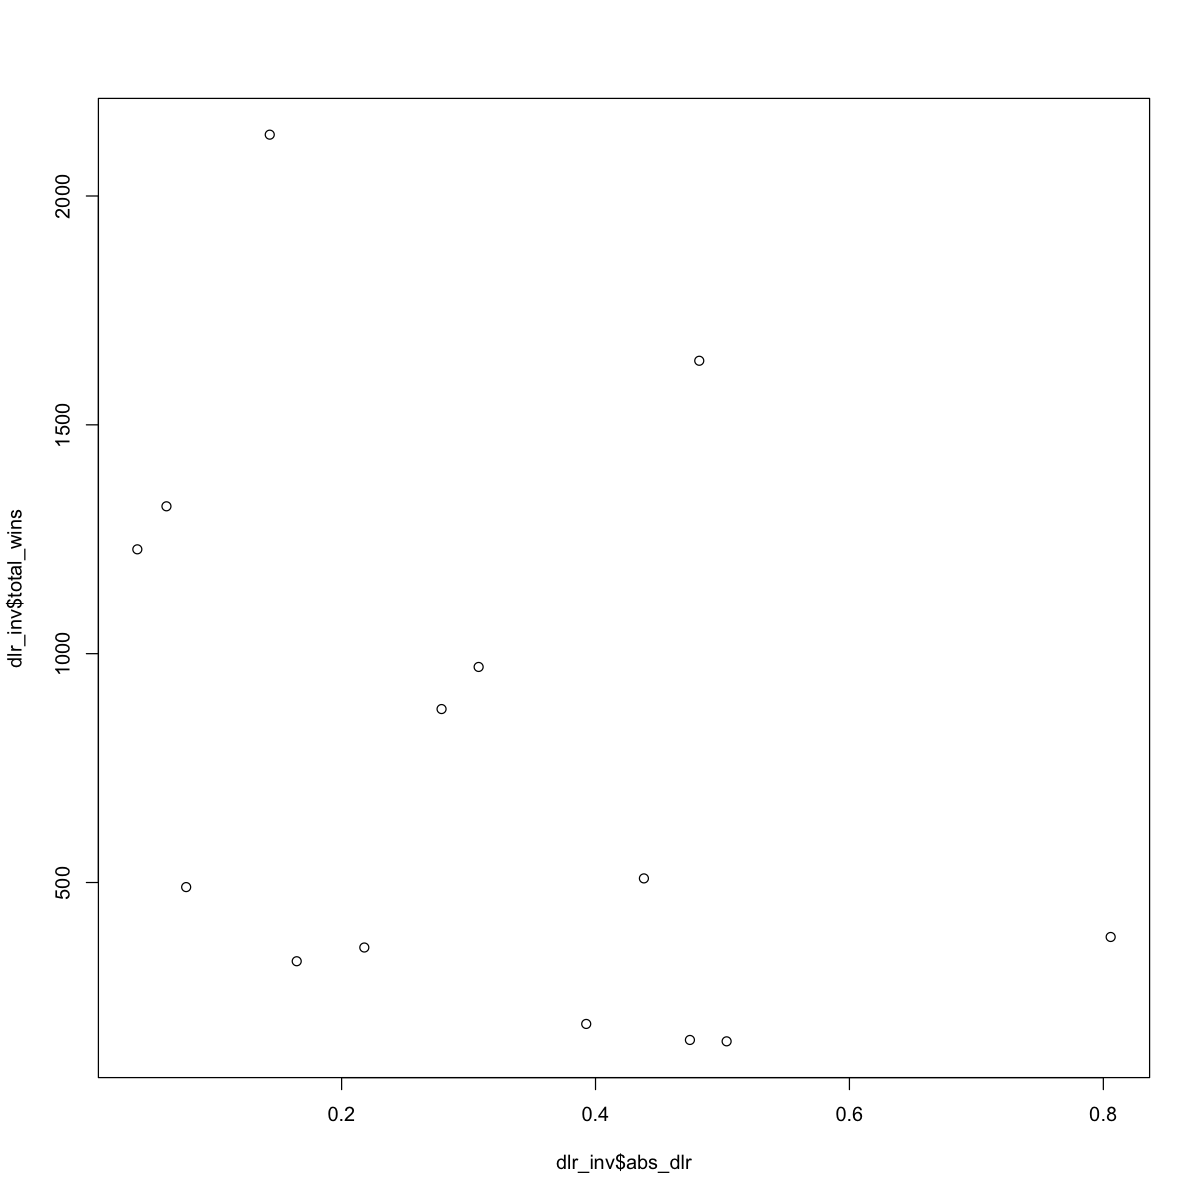

In [131]:
plot(dlr_inv$abs_dlr, dlr_inv$total_wins)
cor.test(dlr_inv$abs_dlr, dlr_inv$total_wins)

In [22]:
### plot PCA for inversion 2.1

pca2.1 <- read.csv("LGC2.1_inversion_frequency.csv",header=TRUE)
head(pca2.1)

,Row.names,Axis1,Axis2,Axis3,genotype,species,sp_code,points,ecotype,country,⋯,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,AMB_5_3,3.073540,1.16340442,1.704628205,RA,L. arcana,blue,A,Wave,England,⋯,NA,,,NA,NA,,,,NA,
2,BH_10_1,11.205940,-0.56631255,0.005164465,RR,L. arcana,blue,A,Wave,Wales,⋯,NA,,,NA,NA,,,,NA,
3,NE_E1_367_La,-7.203897,-0.74094840,1.493543269,AA,L. arcana,blue,A,Wave,England,⋯,NA,,,NA,NA,,,,NA,
4,NE_E2_140_La,11.578199,-0.51400333,2.351591499,RR,L. arcana,blue,A,Wave,England,⋯,NA,,,NA,NA,,A,R,NA,R
5,NE_E2_158_La,2.510040,0.46463071,2.334138122,RA,L. arcana,blue,A,Wave,England,⋯,NA,AA,L. arcana,3,NA,arcana,11,39,0.220,0.78
6,NE_E2_410_La,11.138919,0.05655881,2.586459247,RR,L. arcana,blue,A,Wave,England,⋯,NA,RA,L. arcana,5,NA,comp,7,1,0.875,0.125


In [26]:
pdf("2.1_PCA.pdf", width = 5, height = 5)
plot(pca2.1$Axis1,pca2.1$Axis2, col=pca2.1$sp_code, pch=pca2.1$points, cex=1.3)
dev.off()

pdf 
  2

In [20]:
as.data.frame(table(pca2.1$genotype,pca2.1$species))

Var1,Var2,Freq
<fct>,<fct>,<int>
AA,L. arcana,3
RA,L. arcana,5
RR,L. arcana,17
AA,L. compressa,3
RA,L. compressa,1
RR,L. compressa,0
AA,L. saxatilis,46
RA,L. saxatilis,14
RR,L. saxatilis,7


In [18]:
as.matrix

    
     L. arcana L. compressa L. saxatilis L. saxatilis_spain
  AA         3            3           46                  5
  RA         5            1           14                  0
  RR        17            0            7                  7